# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [3]:
# Q1 (code)
!pip install tomotopy
!pip install little_mallet_wrapper

import tomotopy as tp
import little_mallet_wrapper as lmw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 22.1 MB/s eta 0:00:00


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [4]:
# Q2 (code)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

sanders_tweets = pd.read_csv('/content/drive/My Drive/Assignment3-AD/sanders_tweets.csv')
trump_tweets = pd.read_csv('/content/drive/My Drive/Assignment3-AD/trump_tweets.csv')

combined_tweets = pd.concat([sanders_tweets, trump_tweets])

combined_tweets.reset_index(drop=True, inplace=True)

combined_tweets.head()


Mounted at /content/drive


,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [5]:
# Q3 (code)

# Tip: add the following line to remove URLS and user mentions

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk
nltk.download('punkt')
nltk.download('stopwords')

training_data = []
original_texts = []
titles = []

stop_words = set(stopwords.words('english'))
for index, row in combined_tweets.iterrows():
    original_text = row['Content'].lower()
    original_texts.append(original_text)
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump|rt", '', original_text, flags=re.MULTILINE)
    words = word_tokenize(processed_text)

    words_filtered = [word for word in words if word not in stop_words and word.isalpha()]

    training_data.append(' '.join(words_filtered))
    titles.append(f"{row['Username']} - {row['TweetId']}")

training_data[0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg increase minimum wage must tax rich amp raise minimum wage least'

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [8]:
# Q4 (code)
# Number of topics to return
num_topics = 12
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.183251692638855
Iteration: 10	Log-likelihood: -8.7958482211189
Iteration: 20	Log-likelihood: -8.61391492445278
Iteration: 30	Log-likelihood: -8.521064393042751
Iteration: 40	Log-likelihood: -8.464235642168621
Iteration: 50	Log-likelihood: -8.428522313924889
Iteration: 60	Log-likelihood: -8.403569403278466
Iteration: 70	Log-likelihood: -8.38599515515339
Iteration: 80	Log-likelihood: -8.369954632341303
Iteration: 90	Log-likelihood: -8.361821416346288


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [9]:
# Q5a (code)

print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

great people america country back states make many thank world

✨Topic 1✨

news fake media amp even never would like people joe

✨Topic 2✨

border china amp trade wall deal democrats country want would

✨Topic 3✨

biden vote election trump democrats president pelosi joe senate house

✨Topic 4✨

trump president great new jobs economy big thank record history

✨Topic 5✨

great amp state thank endorsement vote total strong military complete

✨Topic 6✨

must trump people change climate street us energy wall war

✨Topic 7✨

health care republicans bill people tax right trump americans security

✨Topic 8✨

trump president democrats amp fbi russia collusion witch mueller hunt

✨Topic 9✨

people must americans country drug every american need america lives

✨Topic 10✨

workers tax pay million wage billion america class working wealth

✨Topic 11✨

president today great thank honor white amp day house noh



In [ ]:
# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?



Topic 0: This topic seems to revolve around concepts related to America's greatness, with keywords like "great," "people," "America," "country," and "world." It likely involves discussions about the United States' role in global affairs, patriotism, and the contributions of its citizens.

Topic 1: This topic appears to focus on criticism of the media, with terms like "fake news," "media," and "people." It also references political figures like "Joe," possibly referring to Joe Biden, and suggests skepticism towards certain narratives presented by the media.

Topic 2: This topic seems to encompass discussions about border security, trade relations with China, and political divisions over these issues. Keywords like "border," "China," "trade," and "Democrats" suggest debates around immigration policies, trade agreements, and partisan differences.

Topic 3: This topic involves discussions related to political elections, including references to Biden, Trump, Democrats, and key political institutions like the Senate and House of Representatives. It reflects ongoing political rivalries and electoral dynamics.

Topic 4: This topic highlights aspects of Donald Trump's presidency, focusing on his accomplishments, endorsements, and support. Keywords like "Trump," "president," "jobs," and "economy" suggest discussions about Trump's policies and their perceived impact on the nation.

Topic 5: This topic appears to address issues related to climate change, energy, and social activism. Keywords like "climate," "energy," "change," and "war" indicate discussions about environmental policies, societal transformations, and potential conflicts.

Topic 6: This topic involves discussions about healthcare, security, taxes, and rights, likely reflecting debates over government policies and their implications for citizens' well-being and security.

Topic 7: This topic may focus on healthcare, tax policies, and issues related to national security, particularly in the context of Republican viewpoints and actions

Topic 8: The keywords in this topic suggest a focus on controversies surrounding President Trump, including allegations of collusion with Russia, FBI investigations, and the Mueller probe..

Topic 9: This topic appears to address the needs and concerns of the American people, particularly regarding drugs.

Topic 10: This topic addresses issues related to economic inequality, taxation, and wealth distribution. Keywords like "workers," "tax," "wage," and "wealth" indicate discussions about labor rights, economic policies, and the distribution of wealth in society.

Topic 11: This topic appears to focus on presidential events and announcements, expressing gratitude and acknowledging honors. Terms like "president," "thank," "honor," and "White House" suggest discussions about official ceremonies and presidential activities.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [10]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5518602914797763 
Per Topic: [0.4331181198358536, 0.5687660958617926, 0.47435120344161985, 0.5474440813064575, 0.4067096248269081, 0.6803870588541031, 0.5045227393507957, 0.5787378564476967, 0.6927223026752471, 0.5402163207530976, 0.6625896602869034, 0.5327584341168403]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [ ]:
# Q6 (words)


A6: The average coherence score is 0.5519, which suggests that the topics have a moderate level of coherence among their top word. This is a good starting point, but there's room for improvement.

Topic 8 with the score of 0.6927, which is the highest coherence score, suggesting that its top words are very much related and likely form a cohesive theme. It indicates that this topic is well-defined and the words are semantically close, making it easier to interpret.

Topic 4 with the coherence score of 0.4067 which is the lowest coherence score, which might indicate that the top words are less semantically related to each other. This could make the topic harder to interpret or suggest that it covers a wider range of subtopics or more disparate ideas.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

Number of Topics: 2, Coherence Score: 0.3198766068555414
Number of Topics: 4, Coherence Score: 0.4699273753911256
Number of Topics: 6, Coherence Score: 0.5063668758918841
Number of Topics: 8, Coherence Score: 0.5144672754817294
Number of Topics: 10, Coherence Score: 0.5236552036833018
Number of Topics: 12, Coherence Score: 0.5257523396052418
Number of Topics: 14, Coherence Score: 0.5370748067407736
Number of Topics: 16, Coherence Score: 0.5357881172560154
Number of Topics: 18, Coherence Score: 0.574900724283523
Number of Topics: 20, Coherence Score: 0.5391451970860363


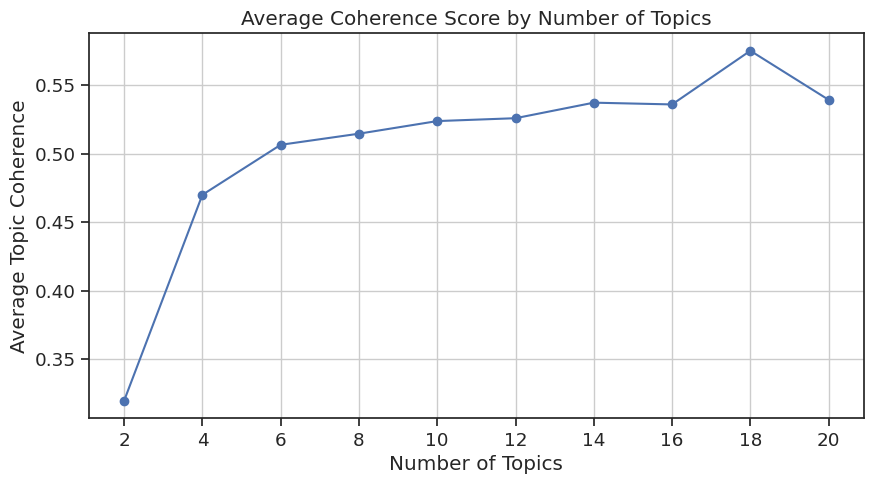

In [11]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt
import tomotopy as tp

def calculate_coherence_scores(training_data, start, end, step, iterations=100, train_step=10):
    coherence_scores = {}

    for k in range(start, end + 1, step):
        model = tp.LDAModel(k=k)

        for text in training_data:
            model.add_doc(words=text.split())

        for i in range(0, iterations, train_step):
            model.train(train_step)

        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence = coh.get_score()
        coherence_scores[k] = average_coherence
        print(f"Number of Topics: {k}, Coherence Score: {average_coherence}")

    return coherence_scores

def plot_coherence_scores(coherence_scores):
    plt.figure(figsize=(10, 5))
    plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), marker='o')
    plt.title('Average Coherence Score by Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Topic Coherence')
    plt.xticks(list(coherence_scores.keys()))
    plt.grid(True)
    plt.show()

coherence_scores = calculate_coherence_scores(training_data, start=2, end=20, step=2)
plot_coherence_scores(coherence_scores)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [14]:
# Q7a (code)
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, usernames, topic_distributions, topic_indices, n=5):
    for topic_index in topic_indices:
        sorted_data = sorted([(_distribution[topic_index], _document, _username)
                              for _distribution, _document, _username
                              in zip(topic_distributions, docs, usernames)], reverse=True)

        topic_words = topics[topic_index]

        make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
        print("---")

        for probability, doc, username in sorted_data[:n]:
            # Make topic words bolded
            for word in topic_words.split():
                if word in doc.lower():
                    doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

            make_md(f'✨  \n**Topic Probability**: {probability}  \n**Username**: {username}  \n**Document**: {doc}\n\n')


topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

usernames = combined_tweets['Username'].tolist()

representative_topics = [3,5,7]

get_top_docs(original_texts, usernames, topic_distributions, representative_topics)



### ✨Topic 3✨

biden vote election trump democrats president pelosi joe senate house



---


✨  
**Topic Probability**: 0.9115685224533081  
**Username**: @realDonaldTrump  
**Document**:  rt @whitehouse: after years of scandal and neglect, the **trump** administration has reorganized the department of veterans affairs around the principle that our veterans deserve the highest standard of care. https://t.co/xchhemfvxa



✨  
**Topic Probability**: 0.9115685224533081  
**Username**: @realDonaldTrump  
**Document**:  getting ready to land in macon, georgia. another giant crowd. see you soon!



✨  
**Topic Probability**: 0.9062772989273071  
**Username**: @realDonaldTrump  
**Document**:  rt @whitehouse: live: **president** @realdonaldtrump delivers remarks at a peaceful protest for law &amp; order https://t.co/blgvcjjnvx



✨  
**Topic Probability**: 0.900312602519989  
**Username**: @realDonaldTrump  
**Document**:  subject only to state approval, our important ethanol industry will be allowed to use the 10% pumps for the 15% blend. thank you! @senjoniernst @chuckgrassley @senatorfischer @senjohnthune @senatorrounds   @kimreynoldsia @epaawheeler @secretarysonny @govkristinoem



✨  
**Topic Probability**: 0.900312602519989  
**Username**: @realDonaldTrump  
**Document**:  https://t.co/gf0hyiwzle



### ✨Topic 5✨

great amp state thank endorsement vote total strong military complete



---


✨  
**Topic Probability**: 0.9476291537284851  
**Username**: @realDonaldTrump  
**Document**:  “the trump administration, trump policies, have put our economy on a trajectory it has never been on before.” griff jenkins, @foxandfriends



✨  
**Topic Probability**: 0.9419598579406738  
**Username**: @realDonaldTrump  
**Document**:  the stories you heard about the 12 russians yesterday took place during the obama administration, not the trump administration. why didn’t they do something about it, especially when it was reported that president obama was informed by the fbi in september, before the election?



✨  
**Topic Probability**: 0.9397871494293213  
**Username**: @realDonaldTrump  
**Document**:  why did nervous nancy allow corrupt politician shifty schiff to lie before congress? he must be a witness, and so should she!



✨  
**Topic Probability**: 0.9397871494293213  
**Username**: @realDonaldTrump  
**Document**:  rt @teamtrump: vice president @mike_pence at @citadel1842: president @realdonaldtrump has the backs of our men &**amp**; women in uniform! https://t.co/ll75zv4qkq



✨  
**Topic Probability**: 0.9397871494293213  
**Username**: @realDonaldTrump  
**Document**:  mini mike bloomberg is a loser who has money but can‚äôt debate and has zero presence, you will see. he reminds me of a tiny version of jeb ‚äúlow energy‚äù bush, but jeb has more political skill and has treated the black community much better than mini!https://twitter.com/danscavino/status/1227923602135244801 ‚ä¶



### ✨Topic 7✨

health care republicans bill people tax right trump americans security



---


✨  
**Topic Probability**: 0.966472864151001  
**Username**: SenSanders  
**Document**: i say to mitch mcconnell: do not ignore the will of 200 million **americans** who want us to put an end to starvation wages in the united states.

let the american **people** have a vote on a $15 minimum wage! https://t.co/p0uae6mmo9



✨  
**Topic Probability**: 0.9657551050186157  
**Username**: SenSanders  
**Document**: you want good, clean teeth? simple: brush your teeth, floss, and fight for medicare for all. https://t.co/6bvedhgyzy



✨  
**Topic Probability**: 0.9634048938751221  
**Username**: SenSanders  
**Document**: no one should profit from imprisoning **people**, especially children.

we must end this morally repugnant business.



✨  
**Topic Probability**: 0.9607083797454834  
**Username**: SenSanders  
**Document**: big pharma lied about opioid addictiveness. and here they are, joking about their racket in these emails. their greed has no limits. we must pass the opioid crisis accountability act to hold top executives criminally liable for the devastation they caused. https://t.co/rgjdlyo7py



✨  
**Topic Probability**: 0.9597189426422119  
**Username**: SenSanders  
**Document**: half of our seniors survive on $25,000 a year or less.

outrageously, **trump** tried to make them jump through hoops during a pandemic to get their $1,200 emergency relief payment.

thanks to strong pressure, **trump** reversed this policy. seniors will get the help they need **right** now.



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [ ]:
# Q7b (words)


**Topic 3**: This topic contains keywords related to elections, politicians, and the government, such as "biden", "vote", "election", "trump", "president", etc. As can be seen from the results, all the top five tweets were sent by @realDonaldTrump, suggesting that the topic is more representative and more in line with Trump's views. That may be because the tweets were about Trump himself, his policies or his opponents, and not about Sanders' political views.

**Topic 5**: This topic contains some keywords related to the United States, the military and strength, such as "state", "strong", "military" and so on. Likewise, all the first five tweets were also sent by @realDonaldTrump. This further suggests that the theme is more representative and more in line with Trump's views.

**Topic 7**: This topic contains some keywords related to health care, taxation, people's rights, etc., such as "health care", "tax", "right", etc. All the first five tweets were sent by @SenSanders

This pattern suggests that the topics of these tweets are more closely aligned with the core issues and messaging strategies of the respective politicians. For Sanders, it's his advocacy for the working class and healthcare reform.  For Trump, it's his emphasis on his presidency's successes and his confrontational stance against critics.

The content of the tweets highlights the tactics used by different politicians to communicate with the public, mobilize supporters and construct narratives against their opponents.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [21]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

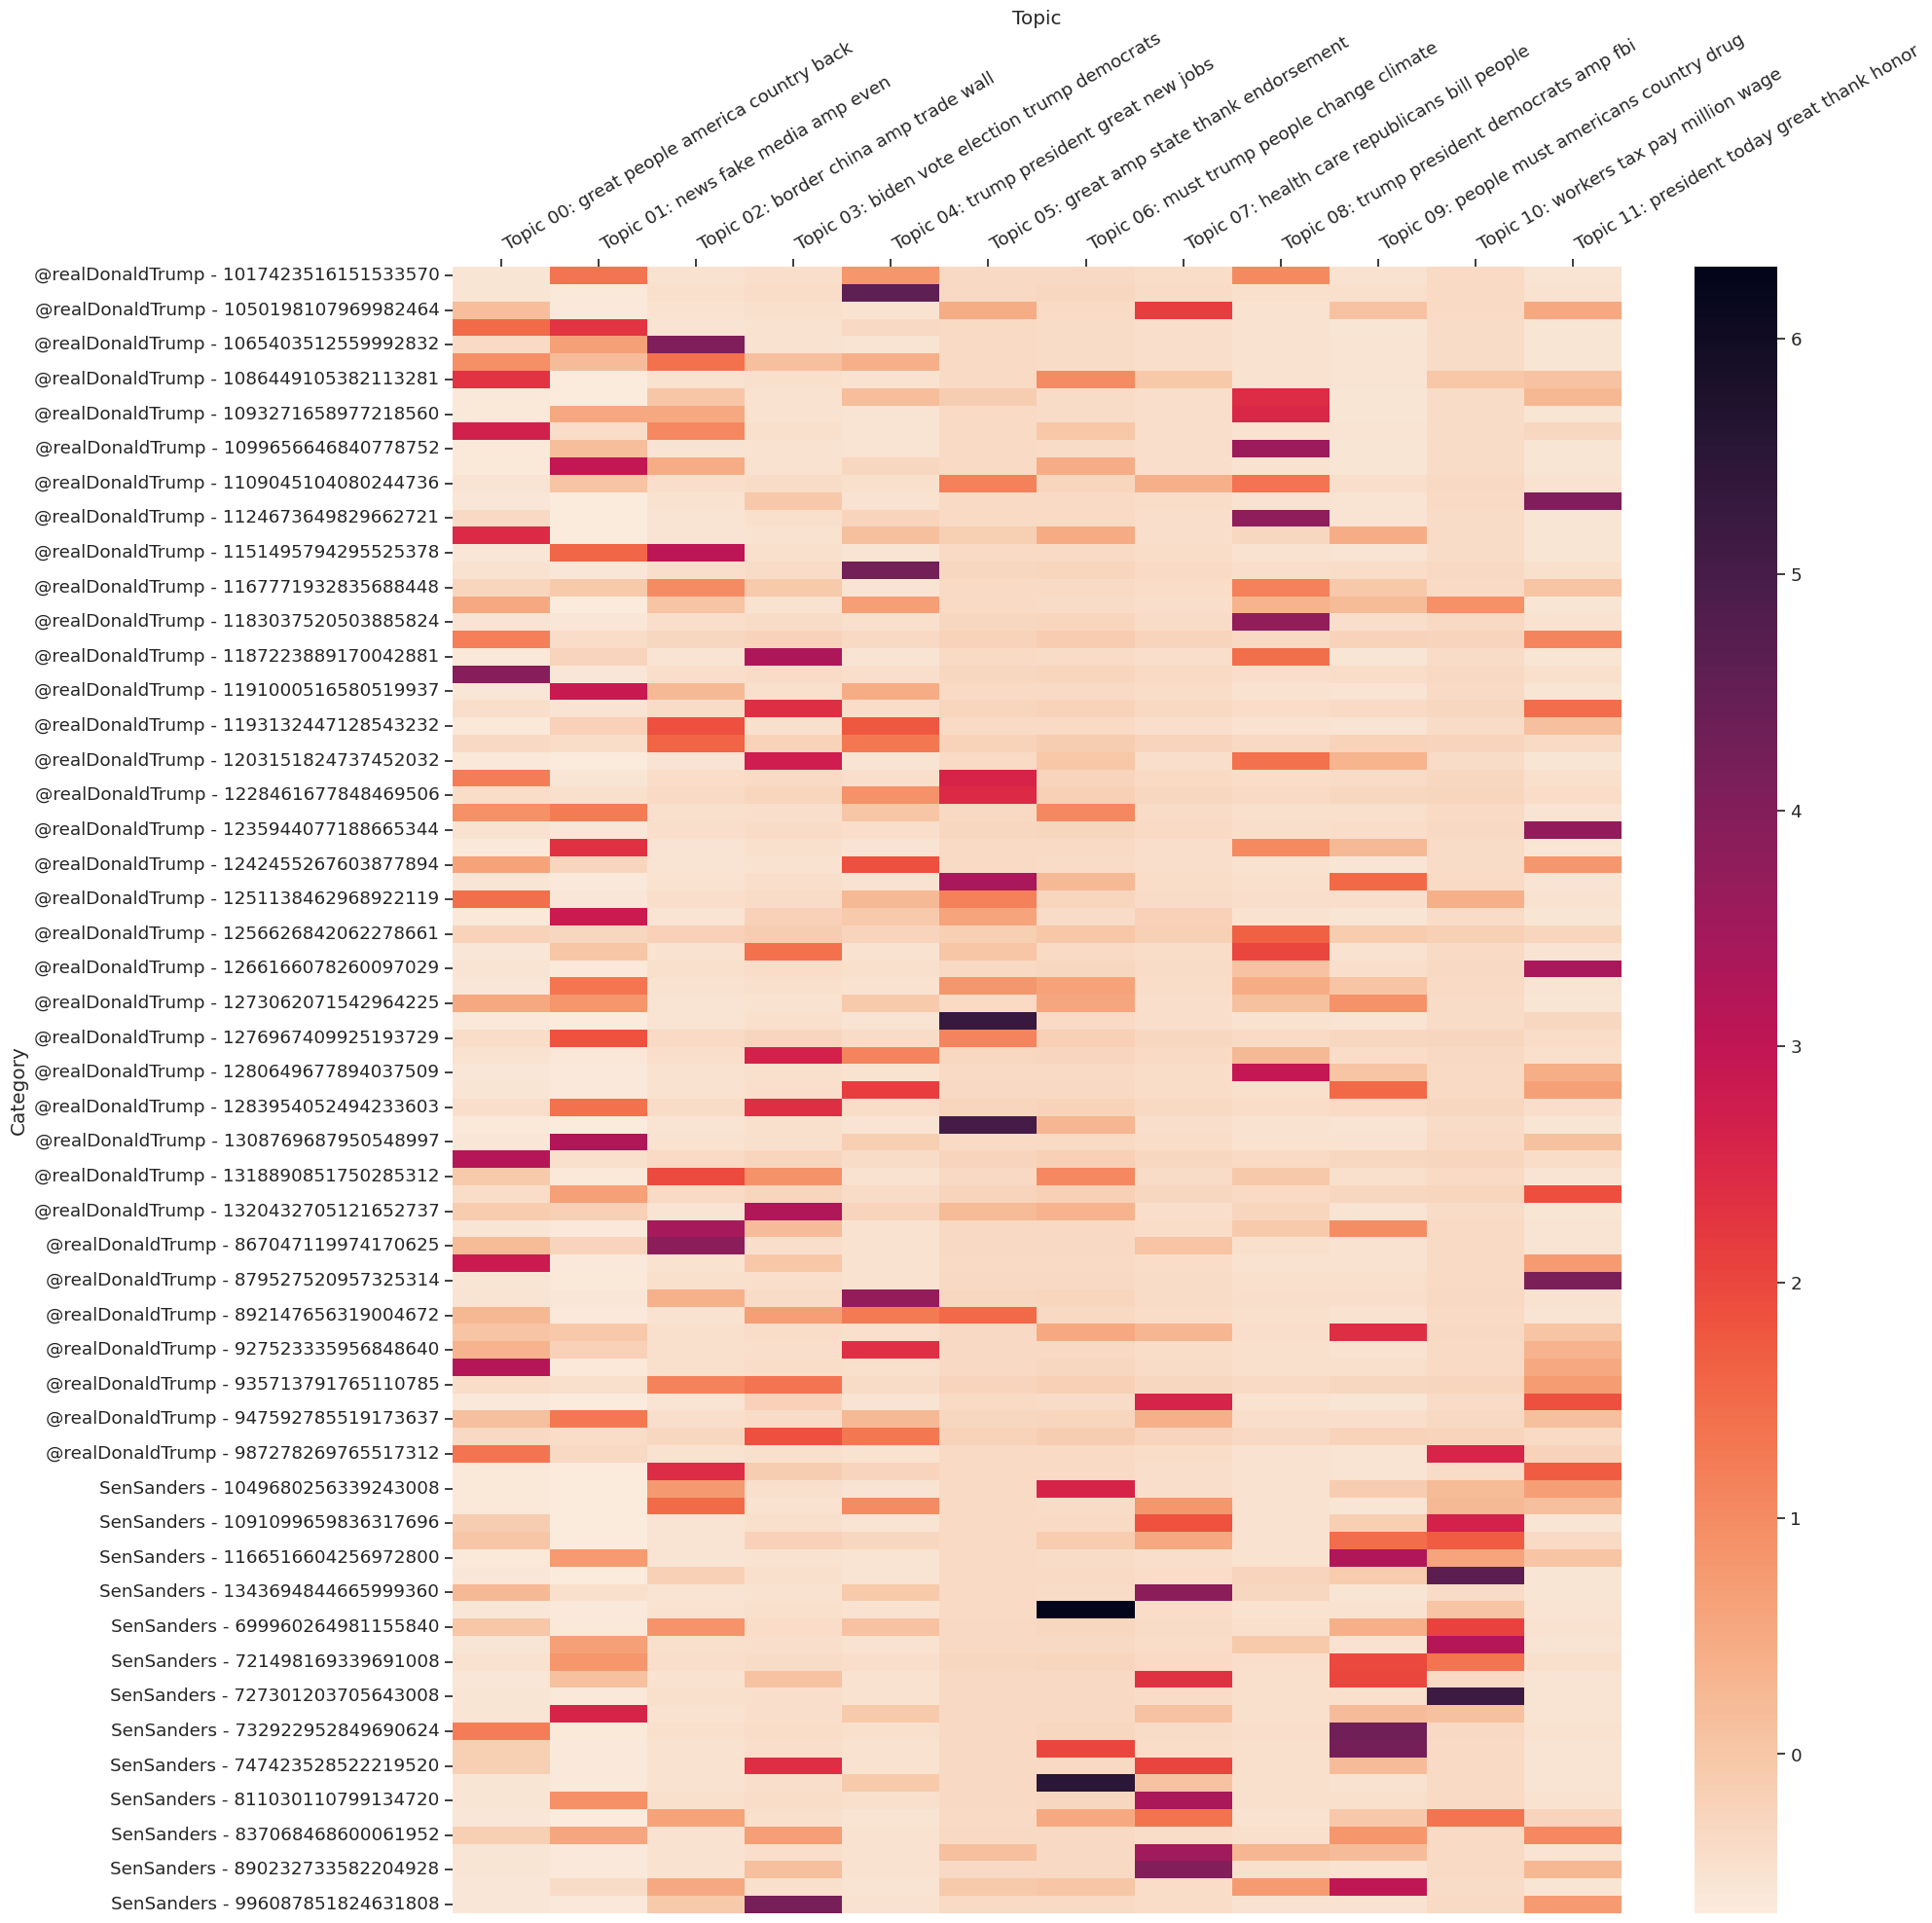

In [22]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample


topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

def plot_categories_by_topics_heatmap(labels, topic_distributions, topics, output_path=None, target_labels=None, color_map=sns.cm.rocket_r, dim=(20, 20)):
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topics[_topic_index].split()[:5])})

    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category', columns='Topic', values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

plot_categories_by_topics_heatmap(titles, topic_distributions, topics, target_labels=target_labels, dim=(20, 20))


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [ ]:
# Q9 (words)

The colors in the heatmap range from light (low probability) to dark (high probability), corresponding to how strongly a particular topic is represented in each tweet. If certain topics have consistently higher probabilities for one politician compared to the other, that would suggest those topics are more characteristic or prioritized by that politician in their public communication.

**Trump**: His tweets might show higher probabilities for topics related to his presidency, defense against impeachment, national pride, and political strategy, as indicated by darker colors in the relevant columns,like topic4, topic5, topic8.

**Sanders**: His tweets could show higher probabilities for topics related to healthcare, workers' rights, and economic inequality, with darker shades appearing in those columns,like topic7, topic9,topic10

Topic2 and topic3 are evenly colored in the distribution of the two people, which may indicate that these issues are their common focus.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [23]:
# X2 (code)
import pandas as pd
from random import sample


# select tweets by trump and sanders
trump_tweets = combined_tweets[combined_tweets['Username'] == '@realDonaldTrump']
sanders_tweets = combined_tweets[combined_tweets['Username'] == 'SenSanders']

# radom select 50 tweets
sample_trump = trump_tweets.sample(n=50)
sample_sanders = sanders_tweets.sample(n=50)

# combine together
balanced_sample = pd.concat([sample_trump, sample_sanders])



### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)